# APS 4

Funções padrões

In [1113]:
from funcoesTermosol import plota, importa, geraSaida

In [1114]:
import math
import numpy as np

A funcao 'importa' retorna o numero de nos [nn], a matriz dos nos [N], o numero
de membros [nm], a matriz de incidencia [Inc], o numero de cargas [nc], o vetor
carregamento [F], o numero de restricoes [nr] e o vetor de restricoes [R] 
contidos no arquivo de entrada.

In [1115]:
[nn,N,nm,Inc,nc,F,nr,R] = importa('entrada_validacao.xls')

In [1116]:
print([nn,nm,nc,nr])

[7, 11, 6, 3]


In [1117]:
Inc

array([[1.00e+00, 2.00e+00, 2.00e+11, 5.25e-06],
       [2.00e+00, 4.00e+00, 2.00e+11, 5.25e-06],
       [4.00e+00, 6.00e+00, 2.00e+11, 5.25e-06],
       [6.00e+00, 7.00e+00, 2.00e+11, 5.25e-06],
       [2.00e+00, 3.00e+00, 2.00e+11, 5.25e-06],
       [3.00e+00, 4.00e+00, 2.00e+11, 5.25e-06],
       [4.00e+00, 5.00e+00, 2.00e+11, 5.25e-06],
       [5.00e+00, 6.00e+00, 2.00e+11, 5.25e-06],
       [1.00e+00, 3.00e+00, 2.00e+11, 5.25e-06],
       [3.00e+00, 5.00e+00, 2.00e+11, 5.25e-06],
       [5.00e+00, 7.00e+00, 2.00e+11, 5.25e-06]])

In [1118]:
R

array([[ 0.],
       [ 1.],
       [13.]])

In [1119]:
F

array([[    0.],
       [    0.],
       [-1300.],
       [-1500.],
       [    0.],
       [    0.],
       [-1300.],
       [-1500.],
       [    0.],
       [    0.],
       [-1300.],
       [-1500.],
       [    0.],
       [    0.]])

In [1120]:
N

array([[  0., 144., 192., 288., 384., 432., 576.],
       [  0.,  72.,   0., 144.,   0.,  72.,   0.]])

In [1121]:
N.shape

(2, 7)

### Função para calcular distâncias, cossenos e senos

In [1122]:
def calc_dist_cs(N, Inc):
    l_list = []
    c_list = []
    s_list = []
    
    for membro in Inc:
        no1 = int(membro[0]) - 1 
        no2 = int(membro[1]) - 1
        l = (math.sqrt((N[0][no1] - N[0][no2])**2 + (N[1][no1] - N[1][no2])**2))
        c = (N[0][no2]-N[0][no1])/l
        s = (N[1][no2]-N[1][no1])/l
        l_list.append(l)
        c_list.append(c)
        s_list.append(s)
    l_array = np.c_[l_list]
    c_array = np.c_[c_list]
    s_array = np.c_[s_list]
    Inc = np.hstack((Inc, l_array))
    Inc = np.hstack((Inc, c_array))
    Inc = np.hstack((Inc, s_array))
    return Inc

ex:

In [1123]:
Inc = calc_dist_cs(N,Inc)
Inc

array([[ 1.00000000e+00,  2.00000000e+00,  2.00000000e+11,
         5.25000000e-06,  1.60996894e+02,  8.94427191e-01,
         4.47213595e-01],
       [ 2.00000000e+00,  4.00000000e+00,  2.00000000e+11,
         5.25000000e-06,  1.60996894e+02,  8.94427191e-01,
         4.47213595e-01],
       [ 4.00000000e+00,  6.00000000e+00,  2.00000000e+11,
         5.25000000e-06,  1.60996894e+02,  8.94427191e-01,
        -4.47213595e-01],
       [ 6.00000000e+00,  7.00000000e+00,  2.00000000e+11,
         5.25000000e-06,  1.60996894e+02,  8.94427191e-01,
        -4.47213595e-01],
       [ 2.00000000e+00,  3.00000000e+00,  2.00000000e+11,
         5.25000000e-06,  8.65332306e+01,  5.54700196e-01,
        -8.32050294e-01],
       [ 3.00000000e+00,  4.00000000e+00,  2.00000000e+11,
         5.25000000e-06,  1.73066461e+02,  5.54700196e-01,
         8.32050294e-01],
       [ 4.00000000e+00,  5.00000000e+00,  2.00000000e+11,
         5.25000000e-06,  1.73066461e+02,  5.54700196e-01,
        -8.3205029

### Função para achar matrizes de rigidez

In [1124]:
def matrizes_rigidez(Inc, nm):
    matrizes = np.zeros(shape=(nm,4,4))   # Considerando a treliça com duas extremidades
    matrizes_coordenada = np.zeros(shape=(nm,4,4,2))   # Considerando as coordenadas alinhadas com os graus de liberdade
    
    i = 0
    for cs in Inc:
        rigidez = cs[2]*cs[3]/cs[4]  # E*A/L para todos os membros
        
    
        
        c = cs[5]
        s = cs[6]
        matriz_cs = [[c**2 ,     c*s,   -(c**2), -(c*s) ],
                     [c*s ,      s**2,  -(c*s),  -(s**2)],
                     [-(c**2),  -(c*s),  c**2,    c*s  ],
                     [-(c*s),   -(s**2), c*s,     s**2  ]]

        matriz_coord = np.zeros(shape=(4,4,2))

        grau_linha = 0
        grau_coluna = 0
        for m in range(4):
            if   m == 0:
                grau_linha = cs[0]*2-1
            elif m == 1:
                grau_linha = cs[0]*2 
            elif m == 2:
                grau_linha = cs[1]*2-1 
            elif m == 3:
                grau_linha = cs[1]*2 
                
            for n in range(4):
                if   n == 0:
                    grau_coluna = cs[0]*2-1
                elif n == 1:
                    grau_coluna = cs[0]*2
                elif n == 2:
                    grau_coluna = cs[1]*2-1
                elif n == 3:
                    grau_coluna = cs[1]*2

                matriz_coord[m][n] = (grau_linha-1, grau_coluna-1)
       
        
        matriz_cs = np.multiply(matriz_cs, rigidez)


        matrizes_coordenada[i,:,:,:] = matriz_coord[:,:,:]
        matrizes[i,:,:] = np.add(matrizes[i,:,:], matriz_cs)

        i+=1
       
    return matrizes, matrizes_coordenada


ex

In [1125]:
a,b= matrizes_rigidez(Inc,nm)
a

array([[[ 5217.4919475 ,  2608.74597375, -5217.4919475 , -2608.74597375],
        [ 2608.74597375,  1304.37298687, -2608.74597375, -1304.37298687],
        [-5217.4919475 , -2608.74597375,  5217.4919475 ,  2608.74597375],
        [-2608.74597375, -1304.37298687,  2608.74597375,  1304.37298687]],

       [[ 5217.4919475 ,  2608.74597375, -5217.4919475 , -2608.74597375],
        [ 2608.74597375,  1304.37298687, -2608.74597375, -1304.37298687],
        [-5217.4919475 , -2608.74597375,  5217.4919475 ,  2608.74597375],
        [-2608.74597375, -1304.37298687,  2608.74597375,  1304.37298687]],

       [[ 5217.4919475 , -2608.74597375, -5217.4919475 ,  2608.74597375],
        [-2608.74597375,  1304.37298687,  2608.74597375, -1304.37298687],
        [-5217.4919475 ,  2608.74597375,  5217.4919475 , -2608.74597375],
        [ 2608.74597375, -1304.37298687, -2608.74597375,  1304.37298687]],

       [[ 5217.4919475 , -2608.74597375, -5217.4919475 ,  2608.74597375],
        [-2608.74597375,  1304.3

In [1126]:
b

array([[[[ 0.,  0.],
         [ 0.,  1.],
         [ 0.,  2.],
         [ 0.,  3.]],

        [[ 1.,  0.],
         [ 1.,  1.],
         [ 1.,  2.],
         [ 1.,  3.]],

        [[ 2.,  0.],
         [ 2.,  1.],
         [ 2.,  2.],
         [ 2.,  3.]],

        [[ 3.,  0.],
         [ 3.,  1.],
         [ 3.,  2.],
         [ 3.,  3.]]],


       [[[ 2.,  2.],
         [ 2.,  3.],
         [ 2.,  6.],
         [ 2.,  7.]],

        [[ 3.,  2.],
         [ 3.,  3.],
         [ 3.,  6.],
         [ 3.,  7.]],

        [[ 6.,  2.],
         [ 6.,  3.],
         [ 6.,  6.],
         [ 6.,  7.]],

        [[ 7.,  2.],
         [ 7.,  3.],
         [ 7.,  6.],
         [ 7.,  7.]]],


       [[[ 6.,  6.],
         [ 6.,  7.],
         [ 6., 10.],
         [ 6., 11.]],

        [[ 7.,  6.],
         [ 7.,  7.],
         [ 7., 10.],
         [ 7., 11.]],

        [[10.,  6.],
         [10.,  7.],
         [10., 10.],
         [10., 11.]],

        [[11.,  6.],
         [11.,  7.],
        

### Função para matriz de rigidez global

In [1127]:
def rigidez_global(matrizes_rigidez, matrizes_coordenadas):
    matriz_global = np.zeros(shape=(nn*2,nn*2))   # Considerando 2 graus de liberdade~
    elemento = 0 
    pos_lin = 0
    pos_col = 0
    for matriz_coordenada in matrizes_coordenadas:
        for linha in matriz_coordenada:
            for coordenada in linha:
                matriz_global[int(coordenada[0])][int(coordenada[1])] += matrizes_rigidez[elemento][pos_lin][pos_col]
                pos_col += 1
            pos_col = 0
            pos_lin += 1
        pos_lin = 0
        elemento += 1
        

    return matriz_global


ex

In [1128]:
mat_global = rigidez_global(a, b)
mat_global

array([[10686.2419475 ,  2608.74597375, -5217.4919475 , -2608.74597375,
        -5468.75      ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ],
       [ 2608.74597375,  1304.37298687, -2608.74597375, -1304.37298687,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ],
       [-5217.4919475 , -2608.74597375, 14168.54290805,  -382.84657208,
        -3733.55901305,  5600.33851958, -5217.4919475 , -2608.74597375,
            0.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ],
       [-2608.74597375, -1304.37298687,  -382.84657208, 11009.25375312,
         5600.33851958, -8400.50777937, -2608.74597375, -1304.37298687,
            0.        ,     0.        ,     0.        ,     0.        ,
            0

### Condições de contorno

In [1129]:
def contorno(mat_global, R, F):
   contorno_lista = []
   for linha in R:
      for indice in linha:
         contorno_lista.append(int(indice))

   matriz_contorno = np.delete(mat_global, contorno_lista, 0)
   matriz_contorno = np.delete(matriz_contorno, contorno_lista, 1)
   matriz_forca_contorno = np.delete(F, contorno_lista, 0)
   return matriz_contorno, matriz_forca_contorno, contorno_lista

ex

In [1130]:
global_contorno, forca_contorno, restricoes = contorno(mat_global, R, F)
global_contorno

array([[14168.54290805,  -382.84657208, -3733.55901305,  5600.33851958,
        -5217.4919475 , -2608.74597375,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ],
       [ -382.84657208, 11009.25375312,  5600.33851958, -8400.50777937,
        -2608.74597375, -1304.37298687,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ],
       [-3733.55901305,  5600.33851958, 16537.83851958, -2800.16925979,
        -1866.77950653, -2800.16925979, -5468.75      ,     0.        ,
            0.        ,     0.        ,     0.        ],
       [ 5600.33851958, -8400.50777937, -2800.16925979, 12600.76166906,
        -2800.16925979, -4200.25388969,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ],
       [-5217.4919475 , -2608.74597375, -1866.77950653, -2800.16925979,
        14168.54290805,     0.        , -1866.77950653,  2800.16925979,
        -5217.4919475 ,  2608.74597375,     0.      

In [1131]:
forca_contorno

array([[-1300.],
       [-1500.],
       [    0.],
       [    0.],
       [-1300.],
       [-1500.],
       [    0.],
       [    0.],
       [-1300.],
       [-1500.],
       [    0.]])

In [1132]:
restricoes

[0, 1, 13]

### Resolvendo a matriz depois das condições de contorno (achar deslocamentos)

Aplicando Gauss-Seidel

In [1133]:
def Gauss_Seidel(a, b):
    x = np.zeros((len(b),1))
    erro = 10000
    n = 0
    while(erro > 1e-10):
        i = 0
        while(i < len(b)):
            sup = 0
            j = 0
            while(j < len(b)):
                if j != i:
                    sup += a[i][j]*x[j]
                j += 1
                
            y = (b[i]-sup)/a[i][i]
        
            if y != 0:
                erro = abs((y - x[i]) / y)
                x[i] = y
            i += 1
            
    return x

ex

In [1134]:
deslocamentos = Gauss_Seidel(global_contorno, forca_contorno)
deslocamentos

array([[ 0.97027523],
       [-4.16384091],
       [ 0.34742857],
       [-4.50318374],
       [ 0.25083339],
       [-4.28701042],
       [ 0.53942857],
       [-4.47851899],
       [-0.31315004],
       [-4.10208593],
       [ 1.12457142]])

### Matriz de deslocamentos

In [1135]:
def resultado_deslocamentos(deslocamentos, restricoes):
    matriz_desolcamentos = np.zeros(shape=(nn*2, 1))
    i_deslocamento = 0
    linha_matriz = 0
    
    for elemento in matriz_desolcamentos[:,0]:
        if linha_matriz not in restricoes:
            matriz_desolcamentos[linha_matriz][0] = deslocamentos[i_deslocamento]
            i_deslocamento += 1
        linha_matriz += 1

    return matriz_desolcamentos
        

ex

In [1136]:
matriz_desolcamentos = resultado_deslocamentos(deslocamentos, restricoes)
matriz_desolcamentos

array([[ 0.        ],
       [ 0.        ],
       [ 0.97027523],
       [-4.16384091],
       [ 0.34742857],
       [-4.50318374],
       [ 0.25083339],
       [-4.28701042],
       [ 0.53942857],
       [-4.47851899],
       [-0.31315004],
       [-4.10208593],
       [ 1.12457142],
       [ 0.        ]])

### Reações de apoio

In [1137]:
def resultado_forcas(matriz_global, matriz_desolcamentos, restricoes):
    matriz_forcas = np.matmul(matriz_global, matriz_desolcamentos)
    deletar = []
    for i in range(matriz_forcas.shape[0]):
        if i not in restricoes:
            deletar.append(i)
    
    matriz_forcas = np.delete(matriz_forcas, deletar, 0)
    return matriz_forcas

In [1138]:
apoios = resultado_forcas(mat_global, matriz_desolcamentos, restricoes)
apoios

array([[3900.00000276],
       [2899.9999967 ],
       [1599.99999633]])

### Deformações

In [1139]:
def resultado_deformacao(Inc, matriz_deslocamento, nm):

    matriz_deformacao = np.zeros(shape=(nm,1))
    i = 0
    for elemento in Inc:
        c = elemento[5]
        s = elemento[6]
        l = elemento[4]
        no1 = int(elemento[0])
        no2 = int(elemento[1])
        mat_cs = [-c, -s, c, s]
        mat_desloc =[[matriz_deslocamento[no1*2-2][0]],
                     [matriz_deslocamento[no1*2-1][0]],
                     [matriz_deslocamento[no2*2-2][0]],
                     [matriz_deslocamento[no2*2-1][0]]]
        #print(mat_desloc)
        resultado_mult = np.matmul(mat_cs, mat_desloc)
        deformacao = np.multiply(resultado_mult, 1/l)
        matriz_deformacao[i][0] = deformacao[0]
        i+=1
    return matriz_deformacao

        

ex

In [1140]:
matriz_deformacao = resultado_deformacao(Inc, matriz_desolcamentos, nm)
matriz_deformacao

array([[-0.00617581],
       [-0.00433904],
       [-0.00364692],
       [-0.00340734],
       [-0.00072969],
       [ 0.00072969],
       [ 0.0018457 ],
       [-0.0018457 ],
       [ 0.00180952],
       [ 0.001     ],
       [ 0.00304762]])

### Tensões internas

In [1141]:
def resultado_tensao(Inc, mat_deformacao):
    mat_tensao = mat_deformacao.copy()
    i = 0
    for elemento in Inc: 
        mat_tensao[i][0] = mat_deformacao[i][0]*elemento[2]
        i+=1
    return mat_tensao

In [1142]:
tensoes = resultado_tensao(Inc, matriz_deformacao)
tensoes

array([[-1.23516136e+09],
       [-8.67807333e+08],
       [-7.29384077e+08],
       [-6.81468334e+08],
       [-1.45938980e+08],
       [ 1.45938979e+08],
       [ 3.69139773e+08],
       [-3.69139773e+08],
       [ 3.61904760e+08],
       [ 1.99999999e+08],
       [ 6.09523808e+08]])

### Forças internas

In [1143]:
def resultado_forca(Inc, mat_tensao):
    mat_forca = mat_tensao.copy()
    i = 0
    for elemento in Inc: 
        mat_forca[i][0] = mat_tensao[i][0]*elemento[3]
        i+=1
    return mat_forca

ex

In [1144]:
forcas = resultado_forca(Inc, tensoes)
forcas

array([[-6484.59712737],
       [-4555.98849722],
       [-3829.26640398],
       [-3577.70875579],
       [ -766.17964319],
       [  766.17964215],
       [ 1937.98380865],
       [-1937.9838106 ],
       [ 1899.99999063],
       [ 1049.99999349],
       [ 3199.99999266]])

### SAÍDA

In [1145]:
#geraSaida("saida", apoios, matriz_desolcamentos,matriz_deformacao, forcas, tensoes)

### Gráficos

In [1146]:
N

array([[  0., 144., 192., 288., 384., 432., 576.],
       [  0.,  72.,   0., 144.,   0.,  72.,   0.]])

In [1147]:
matriz_desolcamentos

array([[ 0.        ],
       [ 0.        ],
       [ 0.97027523],
       [-4.16384091],
       [ 0.34742857],
       [-4.50318374],
       [ 0.25083339],
       [-4.28701042],
       [ 0.53942857],
       [-4.47851899],
       [-0.31315004],
       [-4.10208593],
       [ 1.12457142],
       [ 0.        ]])

In [1148]:
def novas_coordenadas(N, matriz_deslocamentos):
    novo_N = N.copy()
    i_desloc = 0
    x = 0
    y = 0
    for x in range(novo_N.shape[0]):
        for y in range(novo_N.shape[1]):
            novo_N[x][y] += matriz_deslocamentos[i_desloc][0]*1e1
            i_desloc += 2
        i_desloc = 1
    return novo_N

ex

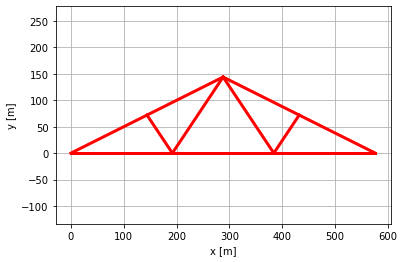

In [1149]:
plota(N, Inc)

In [1150]:
new_N = novas_coordenadas(N, matriz_desolcamentos)
new_N

array([[  0.        , 153.70275231, 195.4742857 , 290.50833387,
        389.39428569, 428.86849958, 587.24571424],
       [  0.        ,  30.36159095, -45.03183743, 101.12989584,
        -44.78518992,  30.97914066,   0.        ]])

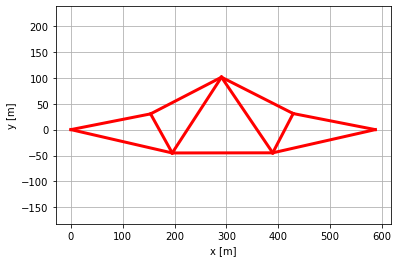

In [1151]:
plota(new_N, Inc)